# Customer Churn Prediction

This is my project. I will type the text and comments later. I am first going to start with the code and before that, understanding the code in the kaggle notebook.

#### Dataset

RowNumber: corresponds to the record (row) number and has no effect on the output.  
CustomerId: contains random values and has no effect on customer leaving the bank.  
Surname: the surname of a customer has no impact on their decision to leave the bank.  
CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.  
Geography: a customer’s location can affect their decision to leave the bank.  
Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.  
Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.  
Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.  
Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.  
NumOfProducts: refers to the number of products that a customer has purchased through the bank.  
HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.  
IsActiveMember: active customers are less likely to leave the bank.  
EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.  
Exited: whether or not the customer left the bank. (0=No,1=Yes)  

In [2]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None)

In [3]:
# Reading the csv file
df = pd.read_csv("churn.csv")

In [4]:
# Viewing the first 5 records
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Removing row number
dat = df.drop("RowNumber", axis = 1)
dat.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Dimension of the dataset
dat.shape

(10000, 13)

In [7]:
# Datatypes of columns
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
# Discriptive statisctics of the data set
dat.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


According to the data set's description, I will choose categorical variables. I will select the upper the upper bound for the number of unique variables as 10 because I want to treat Tenure as a categorical variable.

In [9]:
# Categorical Variables
categorical_variables = [col for col in dat.columns if col in "0"
                        or dat[col].nunique() <= 11
                        and col not in "Exited"]

categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [10]:
# Numeric Variables
numeric_variables = [col for col in dat.columns if dat[col].dtype != "object"
                        and dat[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [11]:
# Frequency of classes of dependent variable
dat["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [12]:
# Customers that left the bank
churn = dat.loc[dat["Exited"] == 1]
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [13]:
# Customers that didn't leave the bank
no_churn = dat.loc[dat["Exited"] == 0]
no_churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [14]:
# Frequency of no_churn group with respect to Geography
no_churn["Geography"].value_counts()

Geography
France     4204
Spain      2064
Germany    1695
Name: count, dtype: int64

In [15]:
# Frequency of churn group with respect to Geography
churn["Geography"].value_counts()

Geography
Germany    814
France     810
Spain      413
Name: count, dtype: int64

In [16]:
# Frequency of no_churn group with respect to Gender
no_churn["Gender"].value_counts()

Gender
Male      4559
Female    3404
Name: count, dtype: int64

In [17]:
# Frequency of churn group with respect to Gender
churn["Gender"].value_counts()

Gender
Female    1139
Male       898
Name: count, dtype: int64

In [18]:
# Frequency of no_churn group with respect to Tenure
no_churn["Tenure"].value_counts()

Tenure
7     851
2     847
8     828
1     803
5     803
3     796
4     786
6     771
9     771
10    389
0     318
Name: count, dtype: int64

In [19]:
# Frequency of churn group with respect to Tenure
churn["Tenure"].value_counts()

Tenure
1     232
3     213
9     213
5     209
4     203
2     201
8     197
6     196
7     177
10    101
0      95
Name: count, dtype: int64

In [20]:
# Frequency of no_churn group with respect to NumOfProducts
no_churn["NumOfProducts"].value_counts()

NumOfProducts
2    4242
1    3675
3      46
Name: count, dtype: int64

In [21]:
# Frequency of churn group with respect to NumOfProducts
churn["NumOfProducts"].value_counts()

NumOfProducts
1    1409
2     348
3     220
4      60
Name: count, dtype: int64

In [22]:
# Frequency of no_churn group with respect to HasCrCard
no_churn["HasCrCard"].value_counts()

HasCrCard
1    5631
0    2332
Name: count, dtype: int64

In [23]:
# Frequency of churn group with respect to HasCrCard
churn["HasCrCard"].value_counts()

HasCrCard
1    1424
0     613
Name: count, dtype: int64

In [24]:
# Frequency of no_churn group with respect to IsActiveMember
no_churn["IsActiveMember"].value_counts()

IsActiveMember
1    4416
0    3547
Name: count, dtype: int64

In [25]:
# Frequency of churn group with respect to IsActiveMember
churn["IsActiveMember"].value_counts()

IsActiveMember
0    1302
1     735
Name: count, dtype: int64

In [26]:
# Credit score statistics of the no_churn group
no_churn["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
5%        492.000000
25%       585.000000
50%       653.000000
75%       718.000000
90%       778.000000
95%       812.000000
99%       850.000000
max       850.000000
Name: CreditScore, dtype: float64

In [27]:
# Credit score statistics of the churn group
churn["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
5%        479.000000
25%       578.000000
50%       646.000000
75%       716.000000
90%       776.400000
95%       812.200000
99%       850.000000
max       850.000000
Name: CreditScore, dtype: float64

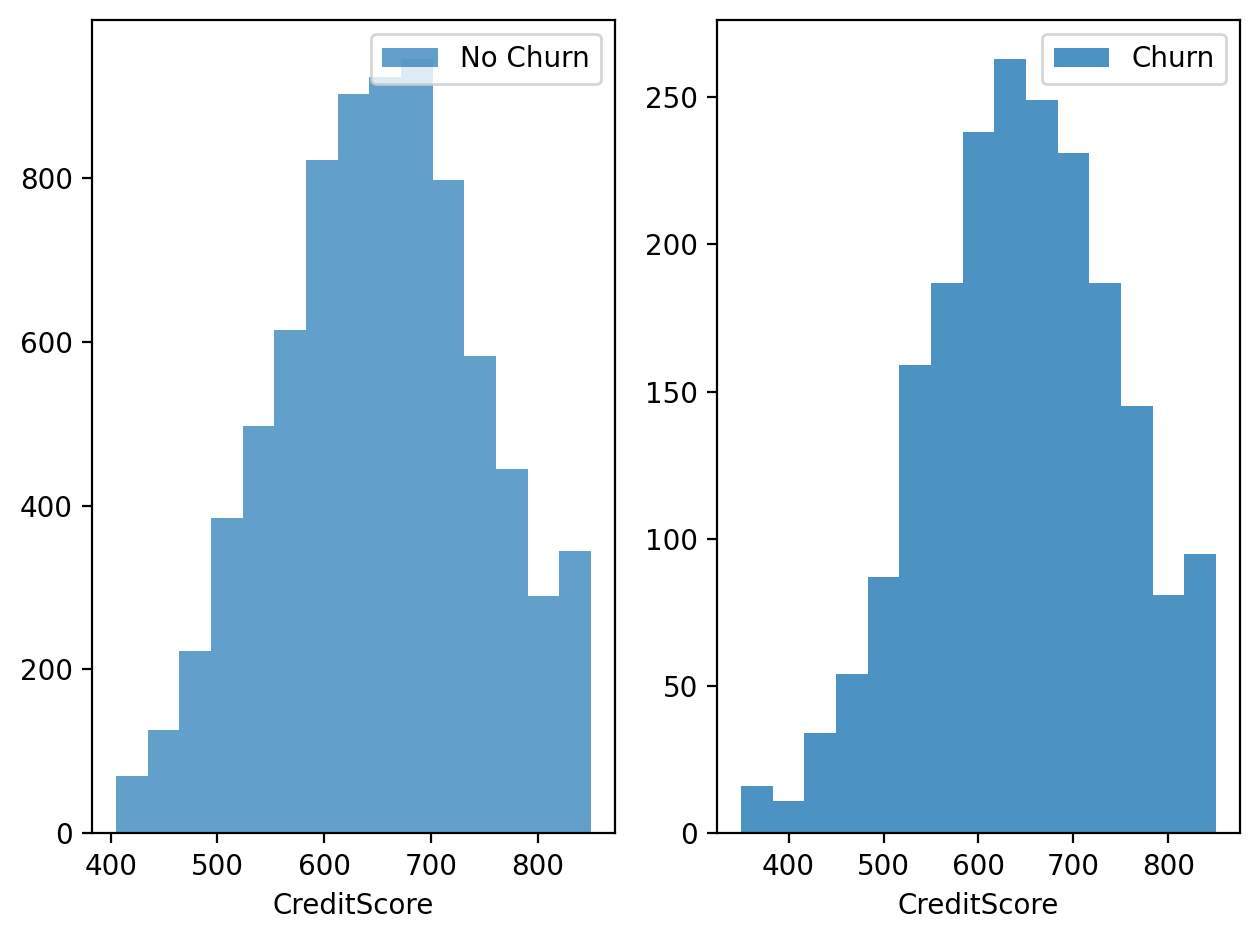

In [28]:
# Distribution of the Credit Score for both groups
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].set_xlabel('CreditScore')
axes[0].hist(no_churn["CreditScore"],bins=15, alpha=0.7, label='No Churn')
axes[0].legend(loc='upper right')

axes[1].set_xlabel('CreditScore')
axes[1].hist(churn["CreditScore"],bins=15, alpha=0.8, label='Churn')
axes[1].legend(loc='upper right')

plt.tight_layout()

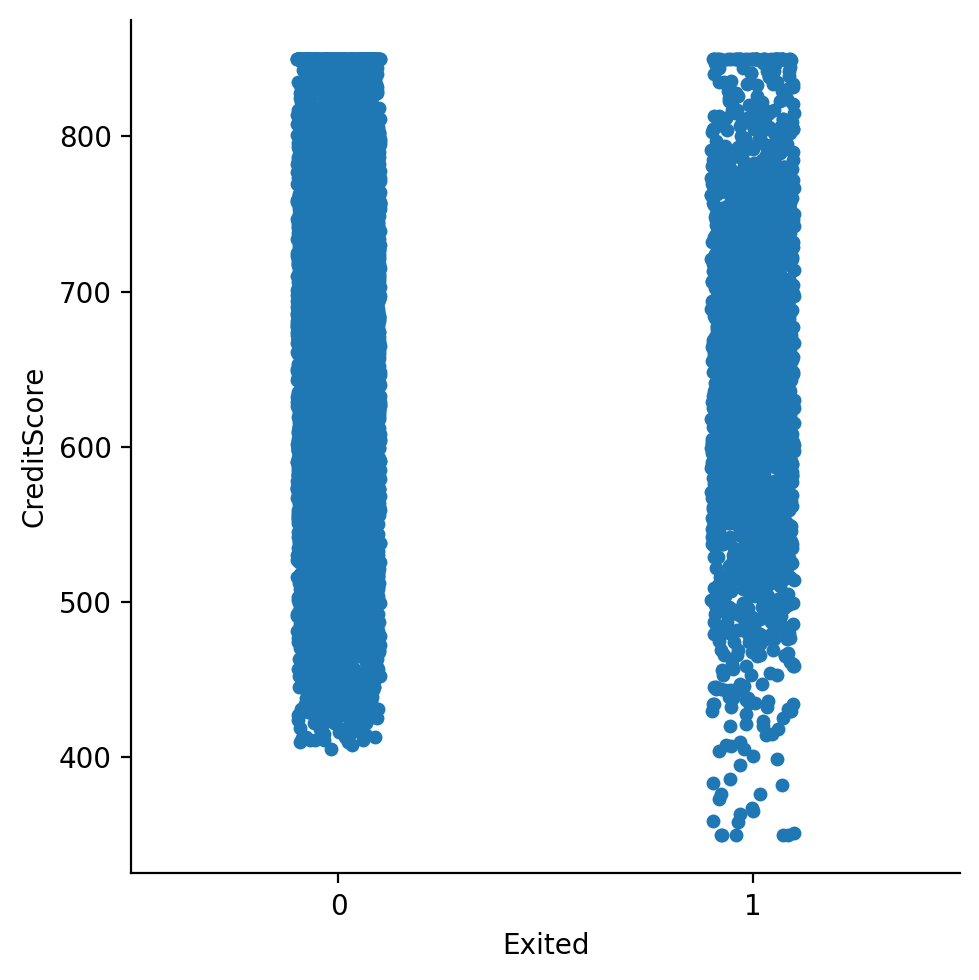

In [29]:
sns.catplot(x = "Exited", y = "CreditScore", data = dat)

In [30]:
# Age statistics of the no_churn group
no_churn["Age"].describe()

count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: Age, dtype: float64

In [31]:
# Age statistics of the churn group
churn["Age"].describe()

count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64

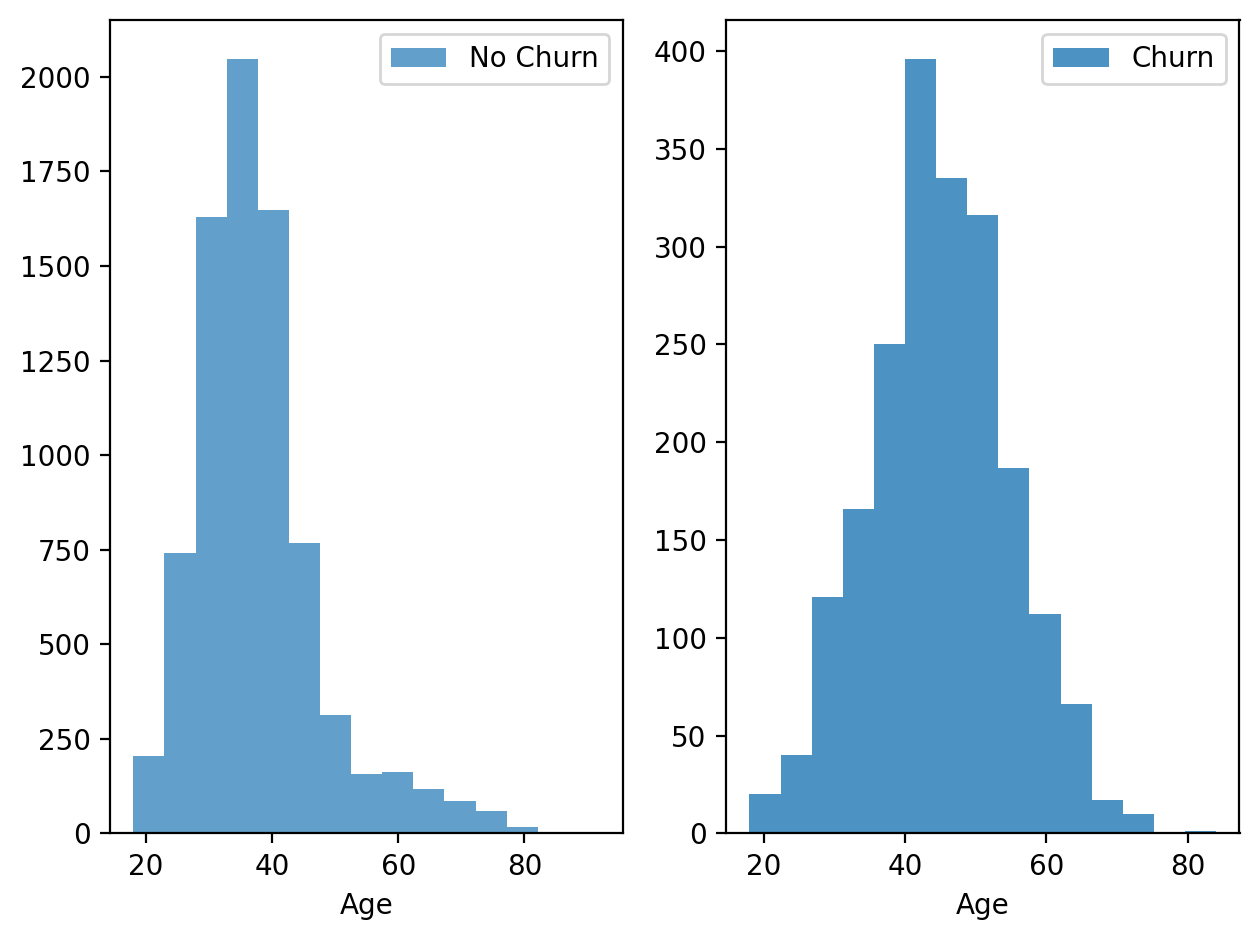

In [32]:
# Distribution of the Age for both groups
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].set_xlabel('Age')
axes[0].hist(no_churn["Age"],bins=15, alpha=0.7, label='No Churn')
axes[0].legend(loc='upper right')

axes[1].set_xlabel('Age')
axes[1].hist(churn["Age"],bins=15, alpha=0.8, label='Churn')
axes[1].legend(loc='upper right')

plt.tight_layout()

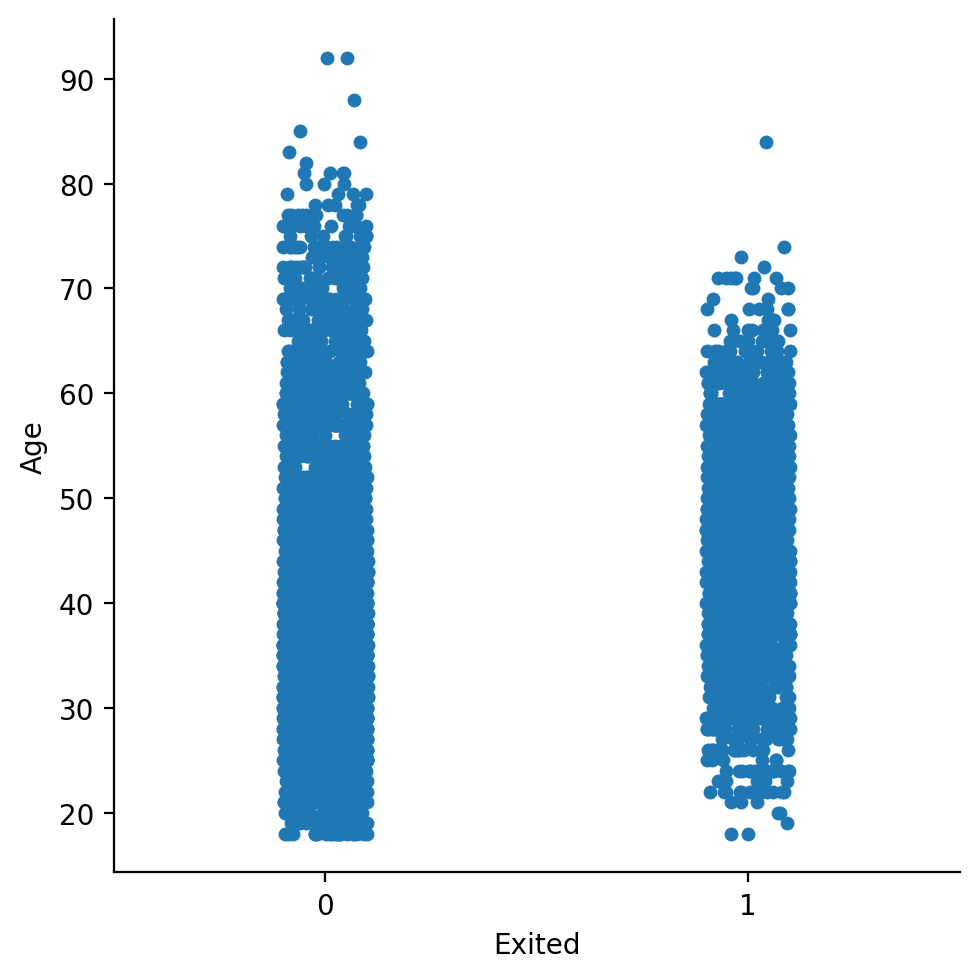

In [33]:
sns.catplot(x = "Exited", y = "Age", data = dat)

In [34]:
# Balance statistics of the no_churn group
no_churn["Balance"].describe()

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64

In [35]:
# Balance statistics of the churn group
churn["Balance"].describe()

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64

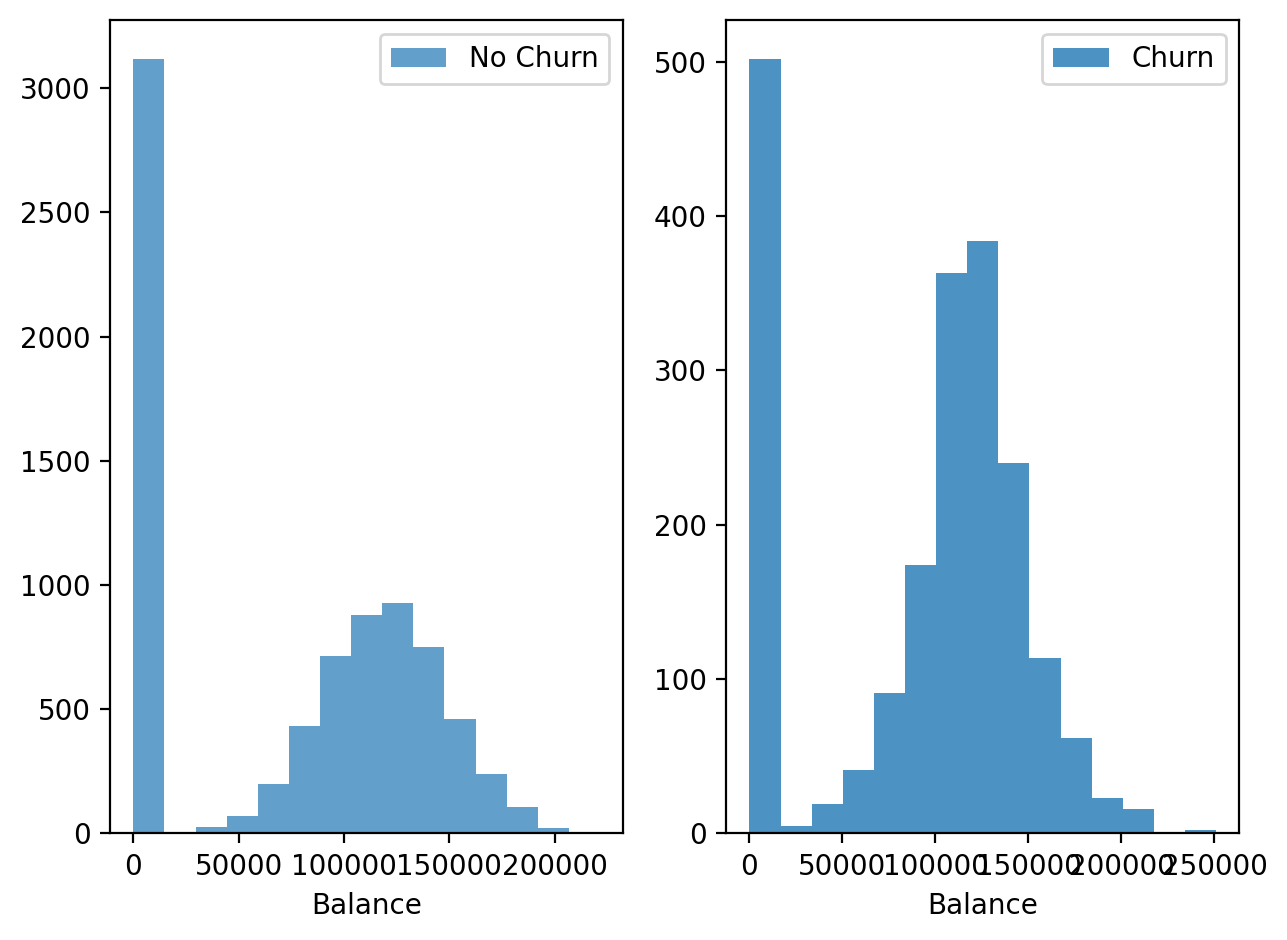

In [36]:
# Distribution of the Balance for both groups
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].set_xlabel('Balance')
axes[0].hist(no_churn["Balance"],bins=15, alpha=0.7, label='No Churn')
axes[0].legend(loc='upper right')

axes[1].set_xlabel('Balance')
axes[1].hist(churn["Balance"],bins=15, alpha=0.8, label='Churn')
axes[1].legend(loc='upper right')

plt.tight_layout()

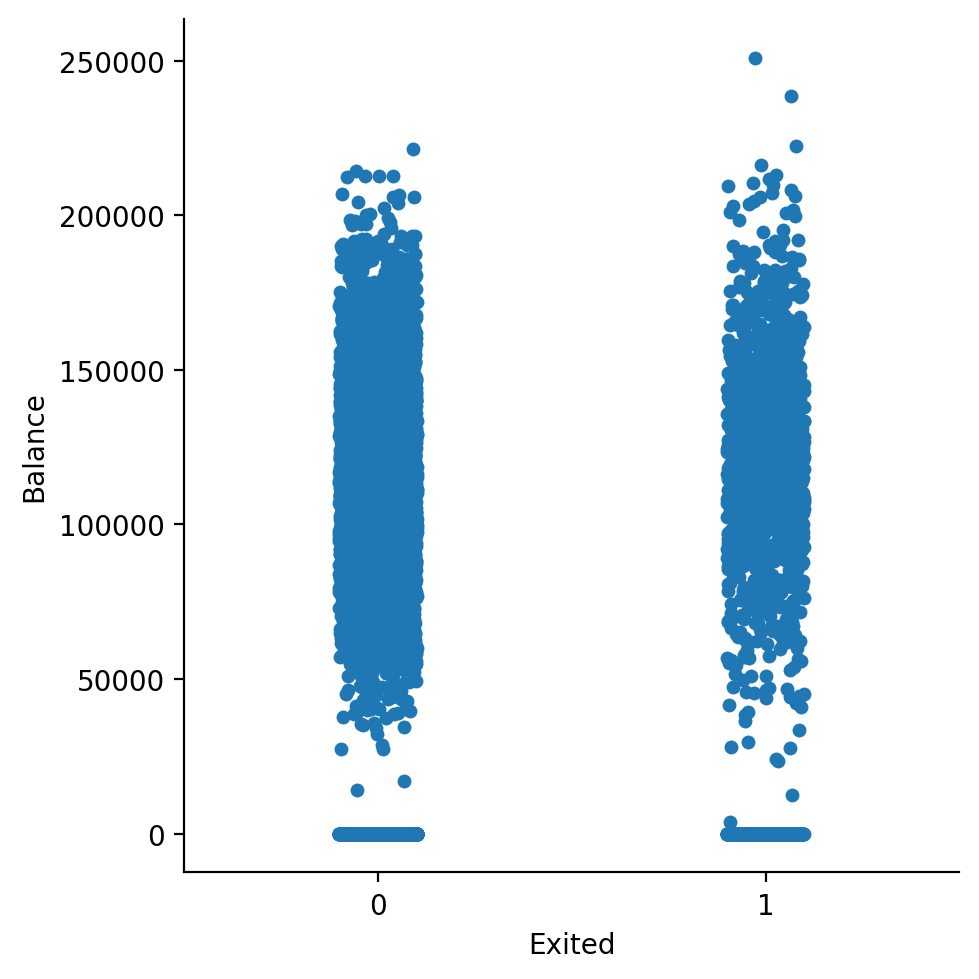

In [37]:
sns.catplot(x = "Exited", y = "Balance", data = dat)

In [38]:
# EstimatedSalary statistics of the no_churn group
no_churn["EstimatedSalary"].describe()

count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
25%       50783.490000
50%       99645.040000
75%      148609.955000
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [39]:
# EstimatedSalary statistics of the churn group
churn["EstimatedSalary"].describe()

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
25%       51907.720000
50%      102460.840000
75%      152422.910000
max      199808.100000
Name: EstimatedSalary, dtype: float64

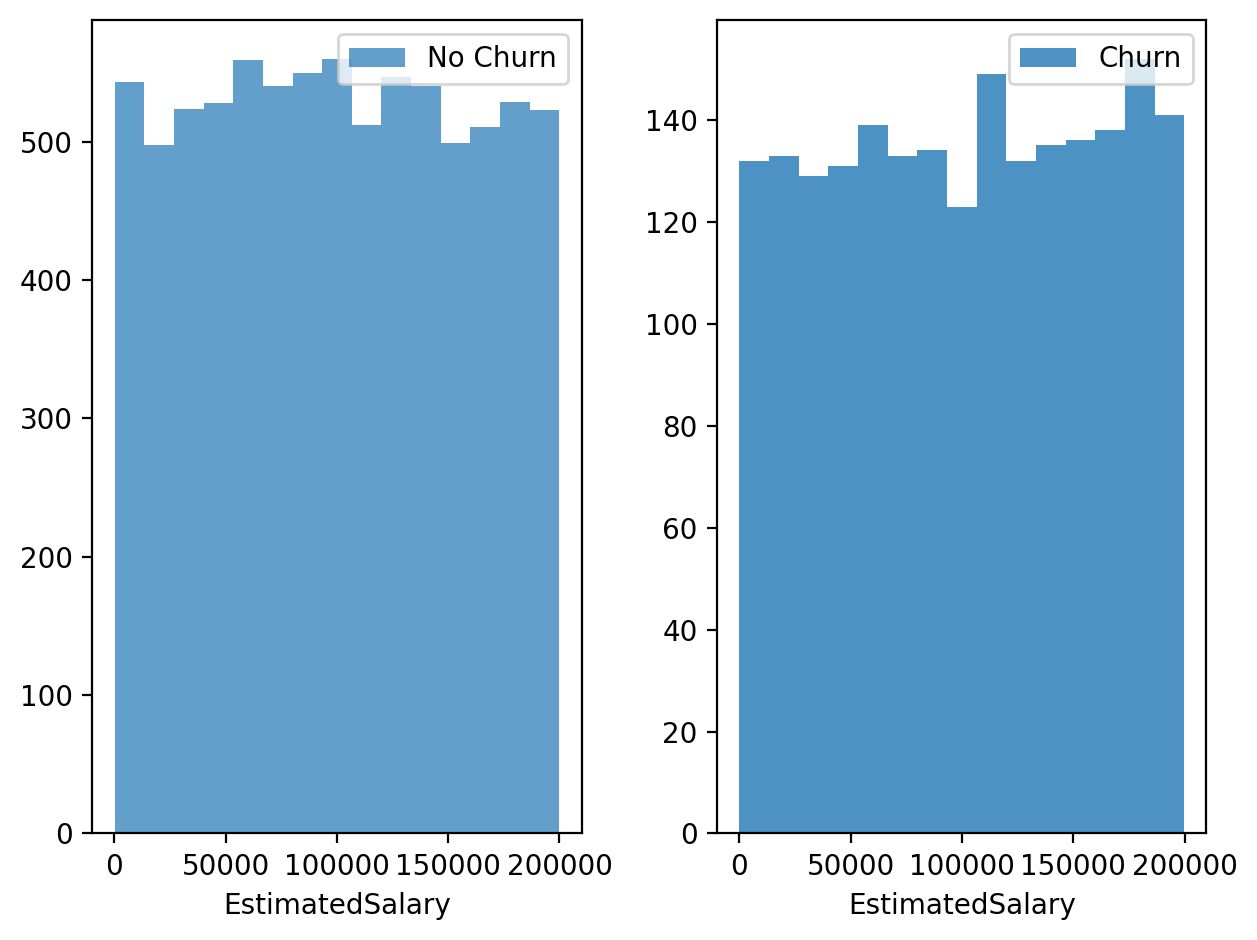

In [40]:
# Distribution of the Balance for both groups
fig, axes = plt.subplots(nrows=1, ncols=2)

axes[0].set_xlabel('EstimatedSalary')
axes[0].hist(no_churn["EstimatedSalary"],bins=15, alpha=0.7, label='No Churn')
axes[0].legend(loc='upper right')

axes[1].set_xlabel('EstimatedSalary')
axes[1].hist(churn["EstimatedSalary"],bins=15, alpha=0.8, label='Churn')
axes[1].legend(loc='upper right')

plt.tight_layout()

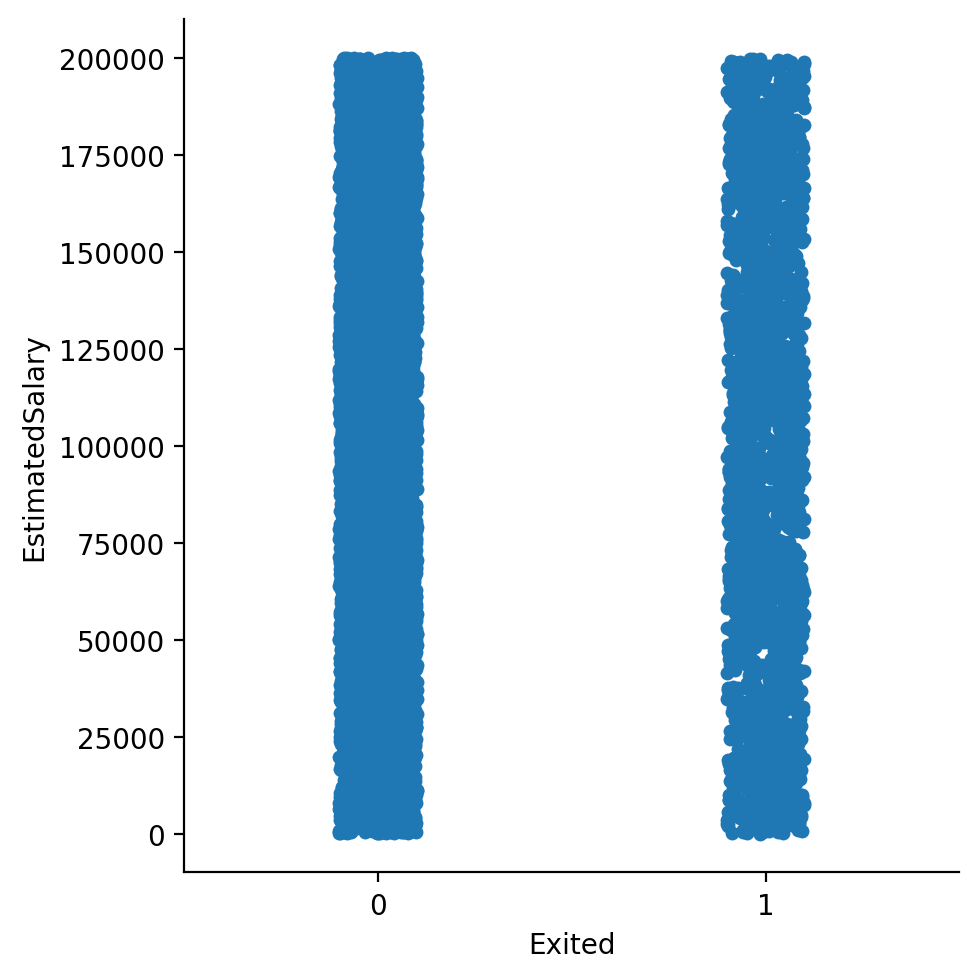

In [41]:
sns.catplot(x = "Exited", y = "EstimatedSalary", data = dat)

<Axes: >

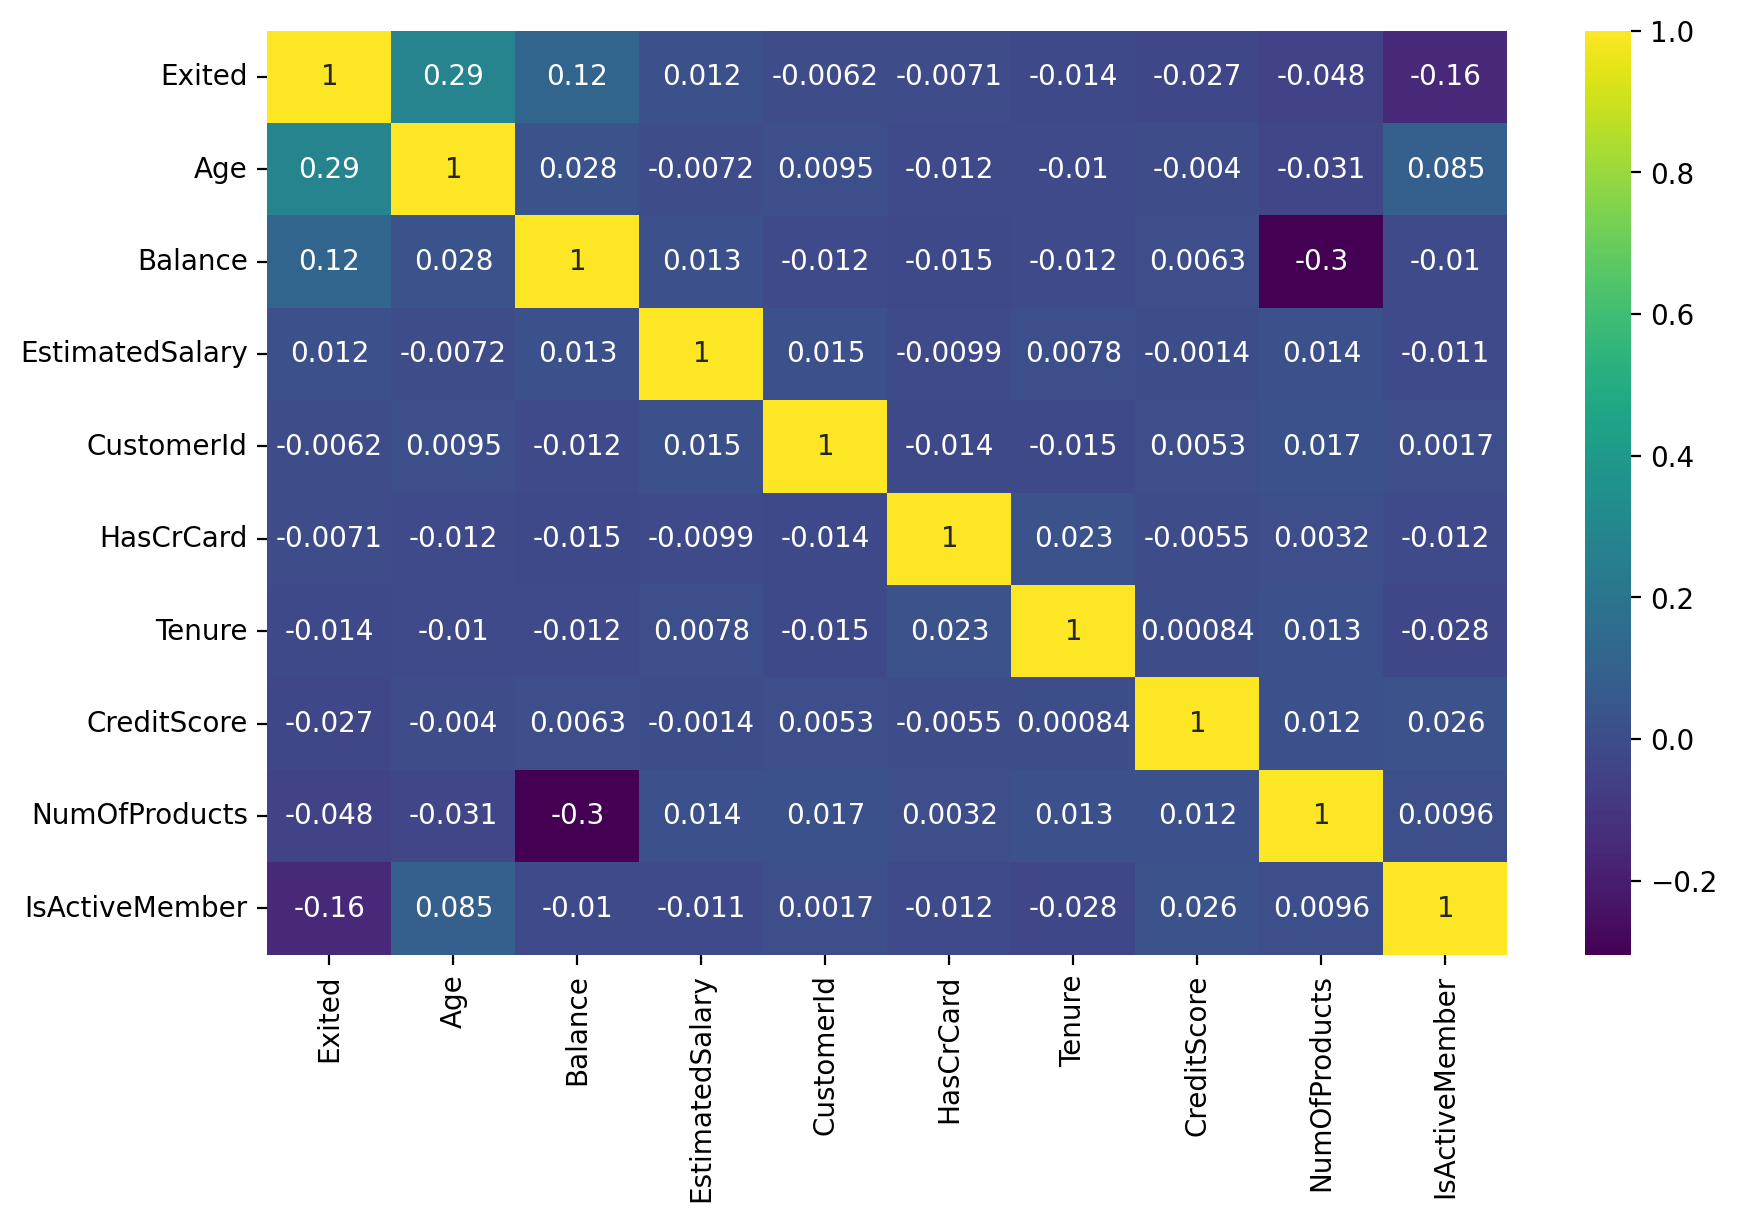

In [42]:
# Exited correlation matrix
numeric_dat = dat.select_dtypes(include=[np.number])

k = 10
correlation_matrix = numeric_dat.corr()
cols = correlation_matrix.nlargest(k, 'Exited')['Exited'].index
cm = numeric_dat[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [43]:
# Missing Observation Analysis
dat.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [44]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [45]:
# Are there any outliers in the variables?
def has_outliers(dataframe, numeric_columns, plot=False):
    variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    if len(variable_names) == 0:
        return None
    else:
        return variable_names

In [46]:
# There is no outlier
for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

CreditScore has  None Outliers
Age has  None Outliers
Balance has  None Outliers
EstimatedSalary has  None Outliers


In [47]:
# we standardize tenure with age
dat["NewTenure"] = dat["Tenure"]/dat["Age"]
dat["NewCreditsScore"] = pd.qcut(dat['CreditScore'], 6, labels = [1, 2, 3, 4, 5, 6])
dat["NewAgeScore"] = pd.qcut(dat['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
dat["NewBalanceScore"] = pd.qcut(dat['Balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
dat["NewEstSalaryScore"] = pd.qcut(dat['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [48]:
dat.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4


In [49]:
# Variables to apply one hot encoding
list = ["Gender", "Geography"]
df = pd.get_dummies(dat, columns =list, drop_first = True)

In [50]:
df.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Male,Geography_Germany,Geography_Spain
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6,False,False,False
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6,False,False,True
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6,False,False,False
3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5,False,False,False
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4,False,False,True


In [51]:
# Removing variables that will not affect the dependent variable
churn_dat = df.drop(["CustomerId","Surname"], axis = 1)

In [52]:
# Scale features using statistics that are robust to outliers.
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [53]:
new_cols_ohe = ["Gender_Male","Geography_Germany","Geography_Spain"]
like_num = [col for col in churn_dat.columns if churn_dat[col].dtypes != 'O' and len(churn_dat[col].value_counts()) <= 10]
cols_need_scale = [col for col in churn_dat.columns if col not in new_cols_ohe
                   and col not in "Exited"
                   and col not in like_num]

for col in cols_need_scale:
    churn_dat[col] = robust_scaler(churn_dat[col])

In [54]:
churn_dat.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Gender_Male,Geography_Germany,Geography_Spain
0,-0.246,0.417,-0.75,-0.761,1,1,1,0.012,1,-0.217,3,6,1,6,False,False,False
1,-0.328,0.333,-1.00,-0.105,1,0,1,0.126,0,-0.279,2,6,3,6,False,False,True
2,-1.119,0.417,0.75,0.489,3,1,0,0.140,1,0.164,1,6,5,6,False,False,False
3,0.351,0.167,-1.00,-0.761,2,0,0,-0.065,0,-0.276,5,5,1,5,False,False,False
4,1.478,0.500,-0.75,0.222,1,1,1,-0.215,0,-0.220,6,6,4,4,False,False,True


In [ ]:
X = churn_dat.drop("Exited",axis=1)
y = churn_dat["Exited"]
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)
# Models for Classification
models = [('LR', LogisticRegression(random_state=123456)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=123456)),
          ('RF', RandomForestClassifier(random_state=123456)),
          ('SVR', SVC(gamma='auto',random_state=123456)),
          ('GB', GradientBoostingClassifier(random_state = 12345)),
          ("LightGBM", LGBMClassifier(random_state=123456))]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=123456, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.825200 (0.008886)
KNN: nan (nan)
CART: 0.791000 (0.013183)
RF: 0.862900 (0.008324)
SVR: 0.845200 (0.008195)
